# Exercice 1 : Schéma d’Euler, calcul d’erreur

On considère le problème suivant :
$$
\left\{
\begin{array}{rl}
x'(t)&=x(t)+2y(t)\\
y'(t)&=2x(t)+y(t)
\end{array}
\right.
$$
sur l'intervalle $[0,1]$ avec la condition initiale $x(0)=5$ et $y(0)=0$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

**Q1)** Faire un programme afin de déterminer la solution approchée de ce système à l'aide d'un schéma d'Euler explicite.

In [2]:
def Euler_exp(X0,f,N,T):
    dt = T/N # pas de temps
    t=0 # temps
    X = np.zeros([N+1,2])
    X[0] = X0
    ## boucle en temps
    for i in range(0,N):
        F = f(t,X[i])
        X[i+1] = X[i] + dt * F
        t += dt
    return X


**Q2)** En prenant un pas de temps $\Delta t = 0.01$, tracer la solution approchée de ce système en fonction du temps et comparer à la solution exacte
$$
  x(t) = \frac52 (e^{-t} + e^{3t}), \quad y(t) = \frac52 (-e^{-t} + e^{3t}).
$$

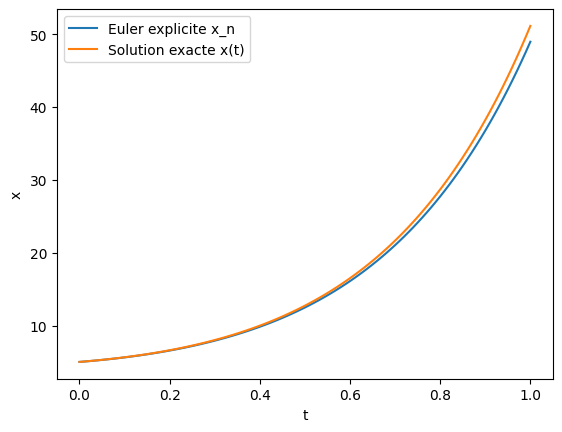

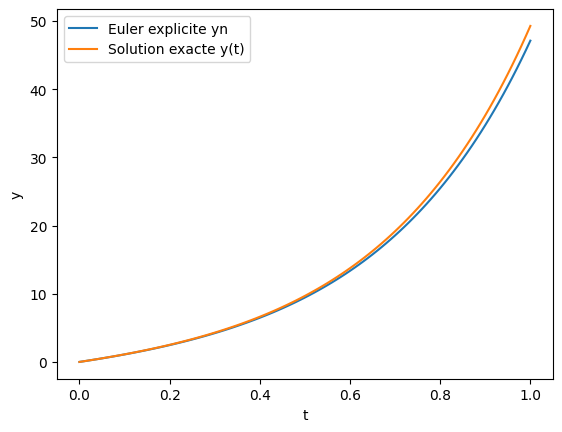

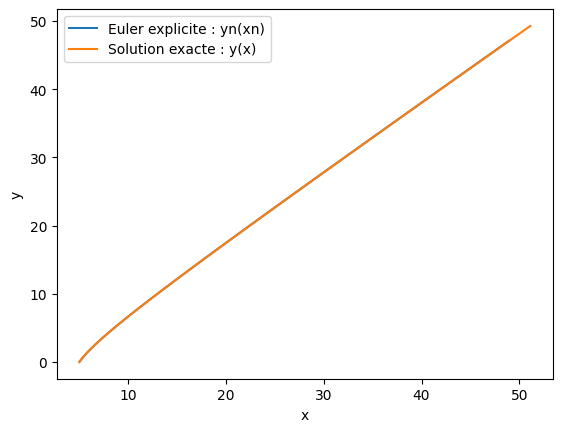

In [3]:
############  Parametres
# conseil : mettre tous les parametres que vous pouvez etre amenes a modifier dans une section au debut du code
T = 1.0 # temps final
N = 100 # nbre de pas de temps

# condition initiale
X0 = np.array([5.,0.])

# solution exacte :
def sol(t):
    a = (X0[0]-X0[1])/2.
    b = (X0[0]+X0[1])/2.
    x = a * np.exp(-t) + b * np.exp(3*t)
    y = - a * np.exp(-t) + b * np.exp(3*t)
    return np.array([x,y])

# fonction second membre f
def f(t,X):
    x = X[0] + 2*X[1]
    y = 2*X[0] + X[1]
    return np.array([x,y])

sol_Euler = Euler_exp(X0, f, N, T)
x_Euler, y_Euler = sol_Euler[:,0] , sol_Euler[:,1]
t_Euler = np.linspace(0,1,N+1)

## solution exacte :
sol_exacte = sol(t_Euler)
sol_x , sol_y = sol_exacte[0,:] , sol_exacte[1,:]

## figure x(t) (Euler et sol exacte)
plt.figure()
plt.plot(t_Euler,x_Euler,label="Euler explicite x_n")
plt.plot(t_Euler,sol_x,label="Solution exacte x(t)")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

## figure y(t) (Euler et sol exacte)
plt.figure()
plt.plot(t_Euler,y_Euler,label="Euler explicite yn")
plt.plot(t_Euler,sol_y,label="Solution exacte y(t)")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

## solution dans le plan des phases (Euler et sol exacte)
plt.figure()
plt.plot(x_Euler,y_Euler,label="Euler explicite : yn(xn)")
plt.plot(sol_x,sol_y,label="Solution exacte : y(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()



**Q3)** Pour $0\leq n \leq N$, on note $t_n=n\Delta t$ les points de discrétisation et $X_n$ la solution approchée au temps $t_n$. écrire un programme
  calculant l'erreur $\max_{0\leq n \leq N}\|X(t_n)-X_n\|_{\infty}$. On pourra utiliser la commande `max` du module `numpy`.

In [8]:
def erreur_Euler_exp(X0,f,N,T):
    sol_Euler = Euler_exp(X0, f, N, T)
    x_Euler , y_Euler = sol_Euler[:,0] , sol_Euler[:,1]
    tps = np.linspace(0,T,N+1)
    sol_exacte = np.transpose(sol(tps))
    sol_x , sol_y = sol_exacte[:,0] , sol_exacte[:,1]

    # erreur
    err_x = np.max(np.abs(x_Euler - sol_x))
    err_y = np.max(np.abs(y_Euler - sol_y))

    return max([err_x, err_y])

**Q4)** Tracer l’erreur de la méthode d’Euler en fonction de $\Delta t$ en échelle log-log (utiliser la fonction `loglog` du module `matplotlib.pyplot`).

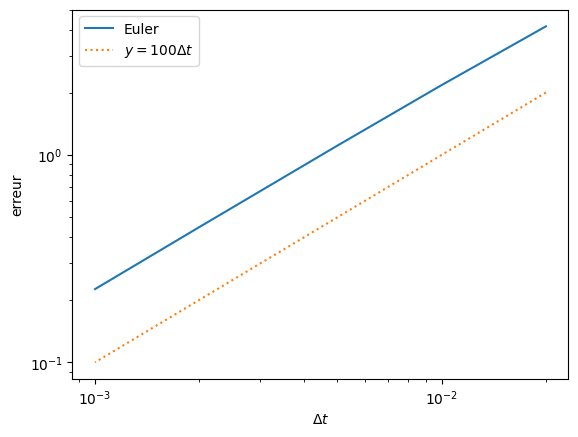

In [9]:
## erreur en fonction du pas de temps (echelle logarithmique)
pas = [50,100,200,500,1000]

err_Euler = []
delta_t = []
for N in pas:
    err_Euler.append(erreur_Euler_exp(X0,f,N,T))
    delta_t.append(T/N)

plt.figure()
plt.loglog(delta_t, err_Euler, label="Euler")
plt.loglog(delta_t, [dt*100 for dt in delta_t], linestyle='dotted', label='$y=100 \\Delta t$')
plt.xlabel('$\\Delta t$')
plt.ylabel("erreur")
plt.legend()
plt.show()

**Q5)** Observer que la pente de l’erreur en échelle log-log est proche de 1. Comment l’interpréter ?

**Q6)** Reprendre les questions précédentes avec le schéma du point milieu
$$
  Y_{n+1}=Y_n+h f\displaystyle\left(t_n+\frac h2,Y_n+\frac h2 f(t_n,Y_n)\right)
$$

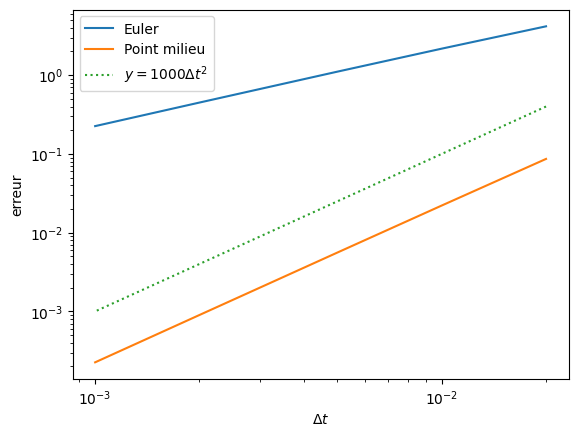

In [6]:
## point milieu
def pt_milieu(X0,f,N,T):
    dt = T/N # pas de temps
    t=0 # temps
    X = np.zeros([N+1,2])
    X[0] = X0
    ## boucle en temps
    for i in range(0,N):
        F1 = f(t,X[i])
        X1 = X[i] + 0.5*dt * F1
        F = f(t+0.5*dt, X1)
        X[i+1] = X[i] + dt * F
        t += dt
    return X

## calcul de l'erreur max commise par le schema du point milieu
def erreur_milieu(X0,f,N,T):
    sol_mil = pt_milieu(X0, f, N, T)
    x_mil , y_mil = sol_mil[:,0] , sol_mil[:,1]
    tps = np.linspace(0,T,N+1)
    sol_exacte = np.transpose(sol(tps))
    sol_x , sol_y = sol_exacte[:,0] , sol_exacte[:,1]

    # erreur
    err_x = LA.norm(x_mil - sol_x, np.inf)
    err_y = LA.norm(y_mil - sol_y, np.inf)

    return max([err_x, err_y])

err_milieu = []
for N in pas:
    err_milieu.append(erreur_milieu(X0,f,N,T))

plt.figure()
plt.loglog(delta_t, err_Euler, label="Euler")
plt.loglog(delta_t, err_milieu, label="Point milieu")
plt.loglog(delta_t, [1000*dt**2 for dt in delta_t], linestyle='dotted', label='$y=1000 \\Delta t^2$')
plt.xlabel('$\\Delta t$')
plt.ylabel("erreur")
plt.legend()
plt.show()